<table>
 <td>Text provided under a Creative Commons Attribution license, CC-BY. All code is made available under the FSF-approved MIT license.</td>
</table>

En partes tomado de "Finite Difference Methods for Ordinary and Partial Differential Equations" by LeVeque (SIAM, 2007).

In [1]:
%matplotlib inline
import numpy
import matplotlib.pyplot as plt

# Soluciones numéricas a Ecuaciones Diferenciales Ordinarias (EDO)

Muchos sistemas físicos, biológicos o químicos pueden ser escritos como sistemas de ecuaciones diferenciales ordinarias (EDOs).  Cuando el estado inicial del sistemas es conocido el problema puede ser descrito por la siguiente ecuación:

$$
    \frac{\text{d} \vec{u}}{\text{d}t} = \vec{f}(t, \vec{u}) \quad \vec{u}(0) = \vec{u}_0
$$

en donde
 - $\vec{u}(t)$ es el vector de estado
 - $\vec{f}(t, \vec{u})$ es una función que entrega un vector que controla el cambio del estado $\vec{u}$ con el tiempo
 - $\vec{u}(0)$ describe el estado inicial en $t = 0$

Para simplificar el tratamiento trabajaremos con vectores de estados que son escalares.

#### Ejemplo: Decaimiento radiactivo
$$
    \vec{u} = [c]
$$
   
$$
    \frac{\text{d} c}{\text{d}t} = -\lambda c \quad c(0) = c_0
$$
   

cuya solución analítica es 
$c(t) = c_0 e^{-\lambda t}$

Primero analizaremos la solución analítica:

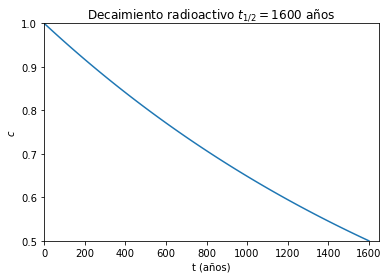

In [2]:
t = numpy.linspace(0.0, 1.6e3, 100)
# Concentración inicial
c_0 = 1.0
# constante de decaimiento k = ln(2) / T (tiempo de decaimiento medio)
decay_constant = numpy.log(2.0) / 1600.0

fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)
axes.plot(t, 1.0 * numpy.exp(-decay_constant * t))

axes.set_title("Decaimiento radioactivo $t_{1/2} = 1600$ años")
axes.set_xlabel('t (años)')
axes.set_ylabel('$c$')
axes.set_xlim((0.0, 1650))
axes.set_ylim((0.5,1.0))
plt.show()

## Esquemas básicos de pasos

Notación:
$$\begin{aligned}
    t_0 &= 0 \\
    t_1 &= t_0 + \Delta t \\
    t_n &= t_{n-1} + \Delta t = n \Delta t + t_0 \\
    u_0 &= u(t_0) \approx U_0 \\
    u_1 &= u(t_1) \approx U_1 \\
    u_n &= u(t_n) \approx U_2 \\
\end{aligned}$$
en donde minúsculas representan valores exactos.  

De lo aprendido en diferenciación numérica podemos aproximar la derivada $f(t,u)$ en la EDO por diferencias finitas:


$$
    \frac{u(t + \Delta t) - u(t)}{\Delta t} = f(t, u)
$$



Con la siguiente transformación
$$
    u(t + \Delta t) - u(t) = \Delta t f(t, u(t))
$$
se obtiene en forma aproximada:
$$
    \frac{U_{n+1} - U_n}{\Delta t} = f(t_n, U_n)
$$
o
$$
    U_{n+1} = U_n + \Delta t f(t_n, U_n)
$$
lo que se conoce como el método de **Euler hacia adelante**. Lo que aproximamos es la derivada con el valor de la función en punto  $t_n$.

### Ejercicio:

¿Cómo se calcula la concentración en función del tiempo para el decaimiento radioactivo?

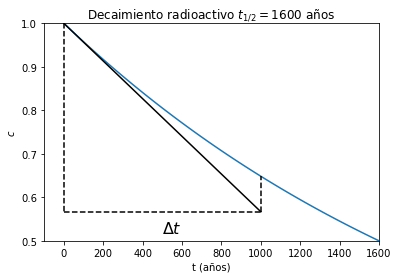

In [3]:
t = numpy.linspace(0.0, 1.6e3, 100)
c_0 = 1.0
decay_constant = numpy.log(2.0) / 1600.0

fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)
axes.plot(t, c_0 * numpy.exp(-decay_constant * t), label="Solución exacta")

# Gráfico del paso de Euler
# tamaño de paso
dt = 1e3
# valor de función u después de un paso
u_np = c_0 + dt * (-decay_constant * c_0)
axes.plot((0.0, dt), (c_0, u_np), 'k')
axes.plot((dt, dt), (u_np, c_0 * numpy.exp(-decay_constant * dt)), 'k--')
axes.plot((0.0, 0.0), (c_0, u_np), 'k--')
axes.plot((0.0, dt), (u_np, u_np), 'k--')
axes.text(dt/2, u_np - 0.05, '$\Delta t$', fontsize=16)

axes.set_title("Decaimiento radioactivo $t_{1/2} = 1600$ años")
axes.set_xlabel('t (años)')
axes.set_ylabel('$c$')
axes.set_xlim(-1e2, 1.6e3)
axes.set_ylim((0.5,1.0))
plt.show()

### Pregunta:
¿Qué efecto tiene la disminución del tamaño de paso?

## Implementación método de Euler



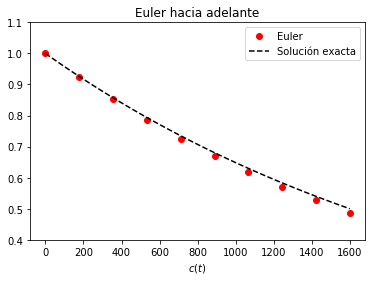

In [4]:
c_0 = 1.0
decay_constant = numpy.log(2.0) / 1600.0
f = lambda t, u: -decay_constant * u

t_exact = numpy.linspace(0.0, 1.6e3, 100)
u_exact = c_0 * numpy.exp(-decay_constant * t_exact)

# Método de Euler
t_euler = numpy.linspace(0.0, 1.6e3, 10)
delta_t = t_euler[1] - t_euler[0]
u_euler = numpy.empty(t_euler.shape)
u_euler[0] = c_0
for (n, t_n) in enumerate(t_euler[:-1]):
    u_euler[n + 1] = u_euler[n] + delta_t * f(t_n, u_euler[n])

fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)
axes.plot(t_euler, u_euler, 'or', label="Euler")
axes.plot(t_exact, u_exact, 'k--', label="Solución exacta")

axes.set_title("Euler hacia adelante")
axes.set_xlabel("t (años)")
axes.set_xlabel("$c(t)$")
axes.set_ylim((0.4,1.1))
axes.legend()
plt.show()

### Pregunta:
¿Cómo cambia la desviación de la solución analítica con el tamaño de paso?

### Método leap-frog

En vez de usar la diferencia finita hacia adelante podemos usar la diferencia centrada que es exacto hasta segundo orden:

$$\frac{U_{n+1} - U_{n-1}}{2\Delta t} = f(t_{n}, U_{n})$$

Este método se llama *leap-frog* o *Método de Euler centrado*. Tome en cuenta que este método requiere el valor de la función en un punto anterior sin usar el valor en el punto actual.

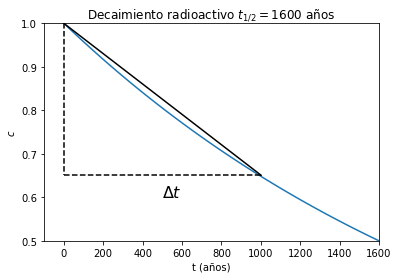

In [5]:
t = numpy.linspace(0.0, 1.6e3, 100)
c_0 = 1.0
decay_constant = numpy.log(2.0) / 1600.0

fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)
axes.plot(t, c_0 * numpy.exp(-decay_constant * t), label="True Solution")

# Gráfico de paso Leap-Frog
dt = 1e3
# -decay_constant * c_0 * numpy.exp(-decay_constant * dt / 2.0) corresponde a U_{n+1} - U_{n-1} / 2 * t
u_np = c_0 + dt * (-decay_constant * c_0 * numpy.exp(-decay_constant * dt / 2.0))
axes.plot((0.0, dt), (c_0, u_np), 'k')
axes.plot((dt, dt), (u_np, c_0 * numpy.exp(-decay_constant * dt)), 'k--')
axes.plot((0.0, 0.0), (c_0, u_np), 'k--')
axes.plot((0.0, dt), (u_np, u_np), 'k--')
axes.text(dt/2, u_np - 0.05, '$\Delta t$', fontsize=16)

axes.set_title("Decaimiento radioactivo $t_{1/2} = 1600$ años")
axes.set_xlabel('t (años)')
axes.set_ylabel('$c$')
axes.set_xlim(-1e2, 1.6e3)
axes.set_ylim((0.5,1.0))
plt.show()

### Implementación método leap-frog

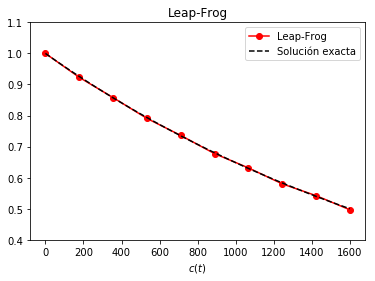

In [6]:
c_0 = 1.0
decay_constant = numpy.log(2.0) / 1600.0
f = lambda t, u: -decay_constant * u

t_exact = numpy.linspace(0.0, 1.6e3, 100)
u_exact = c_0 * numpy.exp(-decay_constant * t_exact)

# Implement leap-frog
t_leapfrog = numpy.linspace(0.0, 1.6e3, 10)
delta_t = t_leapfrog[1] - t_leapfrog[0]
u_leapfrog = numpy.empty(t_leapfrog.shape)
u_leapfrog[0] = c_0
u_leapfrog[1] = u_leapfrog[0] + delta_t * f(t_leapfrog[0], u_leapfrog[0])
for n in range(1, t_leapfrog.shape[0] - 1):
    u_leapfrog[n + 1] = u_leapfrog[n - 1] + 2.0 * delta_t * f(t_leapfrog[n], u_leapfrog[n])

fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)
axes.plot(t_leapfrog, u_leapfrog, 'or-', label="Leap-Frog")
axes.plot(t_exact, u_exact, 'k--', label="Solución exacta")

axes.set_title("Leap-Frog")
axes.set_xlabel("t (años)")
axes.set_xlabel("$c(t)$")
axes.set_ylim((0.4,1.1))
axes.legend()
plt.show()

**Soluciones númericas a EDO no siempre son estables:**

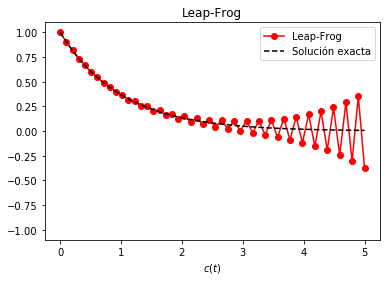

In [7]:
c_0 = 1.0
decay_constant = 1.0
f = lambda t, u: -decay_constant * u

t_exact = numpy.linspace(0.0, 5.0, 100)
u_exact = c_0 * numpy.exp(-decay_constant * t_exact)

# Implement leap-frog
# t_leapfrog = numpy.linspace(0.0, 5.0, 25)
t_leapfrog = numpy.linspace(0.0, 5.0, 50)
delta_t = t_leapfrog[1] - t_leapfrog[0]
u_leapfrog = numpy.empty(t_leapfrog.shape)
u_leapfrog[0] = c_0
u_leapfrog[1] = u_leapfrog[0] + delta_t * f(t_leapfrog[0], u_leapfrog[0])
for n in range(1, t_leapfrog.shape[0] - 1):
    u_leapfrog[n + 1] = u_leapfrog[n - 1] + 2.0 * delta_t * f(t_leapfrog[n], u_leapfrog[n])

fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)
axes.plot(t_leapfrog, u_leapfrog, 'or-', label="Leap-Frog")
axes.plot(t_exact, u_exact, 'k--', label="Solución exacta")

axes.set_title("Leap-Frog")
axes.set_xlabel("t (años)")
axes.set_xlabel("$c(t)$")
axes.set_ylim((-1.1,1.1))
axes.legend()
plt.show()

Similar al método hacia adelante de Euler también se puede usar el  *método de Euler hacia atrás* que evalua la función $f$ en $t_{n+1}$:
$$
    U_{n+1} = U_n + \Delta t f(t_{n+1}, U_{n+1}).
$$
Métodos que evaluan la función $f$ en tiempos desconocidos se llaman *métodos implícitos*.

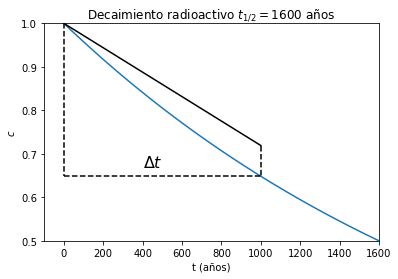

In [8]:
t = numpy.linspace(0.0, 1.6e3, 100)
c_0 = 1.0
decay_constant = numpy.log(2.0) / 1600.0

fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)
axes.plot(t, c_0 * numpy.exp(-decay_constant * t), label="True Solution")

# Plot Euler step
dt = 1e3
u_np = c_0 + dt * (-decay_constant * c_0 * numpy.exp(-decay_constant * dt))
axes.plot((0.0, dt), (c_0, u_np), 'k')
axes.plot((dt, dt), (u_np, c_0 * numpy.exp(-decay_constant * dt)), 'k--')
axes.plot((0.0, 0.0), (c_0, c_0 * numpy.exp(-decay_constant * dt)), 'k--')
axes.plot((0.0, dt), (c_0 * numpy.exp(-decay_constant * dt), c_0 * numpy.exp(-decay_constant * dt)), 'k--')
axes.text(400, u_np - 0.05, '$\Delta t$', fontsize=16)

axes.set_title("Decaimiento radioactivo $t_{1/2} = 1600$ años")
axes.set_xlabel('t (años)')
axes.set_ylabel('$c$')
axes.set_xlim(-1e2, 1.6e3)
axes.set_ylim((0.5,1.0))
plt.show()

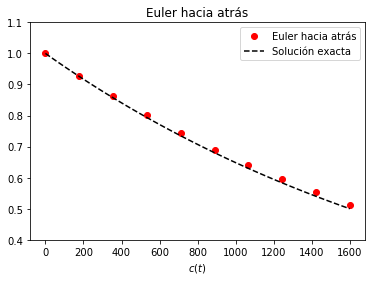

In [9]:
c_0 = 1.0
decay_constant = numpy.log(2.0) / 1600.0
f = lambda t, u: -decay_constant * u

t_exact = numpy.linspace(0.0, 1.6e3, 100)
u_exact = c_0 * numpy.exp(-decay_constant * t_exact)

# Implement backwards Euler
t_backwards = numpy.linspace(0.0, 1.6e3, 10)
delta_t = t_backwards[1] - t_backwards[0]
u_backwards = numpy.empty(t_backwards.shape)
u_backwards[0] = c_0
for n in range(0, t_backwards.shape[0] - 1):
    u_backwards[n + 1] = u_backwards[n] / (1.0 + decay_constant * delta_t)

fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)
axes.plot(t_backwards, u_backwards, 'or', label="Euler hacia atrás")
axes.plot(t_exact, u_exact, 'k--', label="Solución exacta")

axes.set_title("Euler hacia atrás")
axes.set_xlabel("t (años)")
axes.set_xlabel("$c(t)$")
axes.set_ylim((0.4,1.1))
axes.legend()
plt.show()

### Método del trapecio

Otro método esta basado en la regla de trapecio de integracion:
$$
    \frac{U_{n+1} - U_{n}}{\Delta t} = \frac{1}{2} (f(U_n) + f(U_{n+1}))
$$

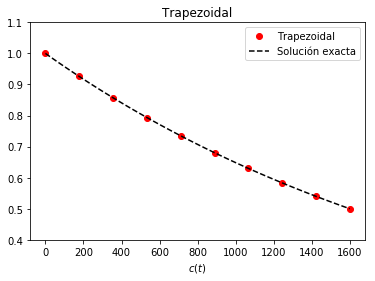

In [10]:
c_0 = 1.0
decay_constant = numpy.log(2.0) / 1600.0
t_exact = numpy.linspace(0.0, 1.6e3, 100)
u_exact = c_0 * numpy.exp(-decay_constant * t_exact)

# Implement trapezoidal method
t = numpy.linspace(0.0, 1.6e3, 10)
delta_t = t[1] - t[0]
u = numpy.empty(t.shape)
u[0] = c_0
integration_constant = (1.0 - decay_constant * delta_t / 2.0) / (1.0 + decay_constant * delta_t / 2.0)
for n in range(t.shape[0] - 1):
    u[n + 1] = u[n] * integration_constant

fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)
axes.plot(t, u, 'or', label="Trapezoidal")
axes.plot(t_exact, u_exact, 'k--', label="Solución exacta")

axes.set_title("Trapezoidal")
axes.set_xlabel("t (años)")
axes.set_xlabel("$c(t)$")
axes.set_ylim((0.4,1.1))
axes.legend()
plt.show()

## Análisis de error en métodos EDO

Recordamos que la solución exacta de una EDO se define por $u(t_n)$ y la versión aproximada por $U_n$.

**Definition:** El *error de truncación* de un método se obtiene reemplazando $U_n$ con la solución exacta $u(t_n)$ en la ecuación de diferencias finitas y analizando la diferencia a la solución exacta.

Si usamos la diferencia finita de Euler hacia adelante
$$
    \frac{U_{n+1} - U_n}{\Delta t} = f(t_n)
$$
y el error de truncamiento esta descrito por
$$
    T(t, u; \Delta t) = \frac{u(t_{n+1}) - u(t_n)}{\Delta t} - f(t_n)
$$


### Análisis de error Euler hacia adelante

Consideramos una serie de Taylor centrada en $t_n$:
$$
    u(t) = u(t_n) + (t - t_n) u'(t_n) + \frac{u''(t_n)}{2} (t - t_n)^2 + \mathcal{O}((t-t_n)^3)
$$

Evaluando esta serie en $t_{n+1}$ se obtiene
$$\begin{aligned}
    u(t_{n+1}) &= u(t_n) + (t_{n+1} - t_n) u'(t_n) + \frac{u''(t_n)}{2} (t_{n+1} - t_n)^2 + \mathcal{O}((t_{n+1}-t_n)^3)\\
    &=u_n + \Delta t f(t_n, u_n) + \frac{u''(t_n)}{2} \Delta t^2 + \mathcal{O}(\Delta t^3)
\end{aligned}$$

Con la definición del error de truncamiento usamos la serie de Taylor en la diferencia finita hacia adelante:
$$
    \frac{U_{n+1} - U_n}{\Delta t} = f(t_n)
$$
y reemplazando la diferencia finita con $u'(t_n)$ 

$$\begin{aligned}
    T(t, u; \Delta t) &= \frac{u(t_{n+1}) - u(t_n)}{\Delta t} - f(t_n) \\
    &= \frac{u(t_{n+1}) - u(t_n)}{\Delta t} - u'(t_n).
\end{aligned}$$

Ahora usamos la serie de Taylor centrada en  $t_n$ y evaluada en $t_{n+1}$ para encontrar
$$\begin{aligned}
    T(t, u; \Delta t) &= \frac{u(t_{n+1}) - u(t_n)}{\Delta t} - u'(t_n) \\
    &= \frac{1}{\Delta t} \left[ u(t_n) + u'(t_n) (t - t_n) + \frac{u''(t_n)}{2} (t - t_n)^2 + \mathcal{O}((t-t_n)^3) - u(t_n) \right] - u'(t_n) \\
    &=  u'(t_n) + \frac{u''(t_n)}{2} \Delta t + \mathcal{O}(\Delta t^2) - u'(t_n) \\
    &= \frac{u''(t_n)}{2} \Delta t + \mathcal{O}(\Delta t^2).
\end{aligned}$$

Esto implica que el método de Euler es exacto hasta primer orden.

### Análisis de error método Leap-Frog

Usamos nuevamente la serie de Taylor
$$
    u(t) = u(t_n) + (t - t_n) u'(t_n) + (t - t_n)^2 \frac{u''(t_n)}{2}  + (t - t_n)^3 \frac{u'''(t_n)}{6} + \mathcal{O}((t-t_n)^4)
$$
y en $t_{n+1}$
$$\begin{aligned}
    u(t_{n+1}) &= u_n + \Delta t f_n + \Delta t^2 \frac{u''(t_n)}{2}  + \Delta t^3 \frac{u'''(t_n)}{6} + \mathcal{O}(\Delta t^4)
\end{aligned}$$

Necesitamos una expansión adicional por el método de leap-frog:
$$
    \frac{U_{n+1} - U_{n-1}}{2 \Delta t} = f(t_n, U_n)
$$
o
$$
    U_{n+1} = U_{n-1} + 2 \Delta t f(t_n, U_n).
$$
Para poder reemplazar $U_{n-1}$ necesitamos escribirlo con relación a $u(t_n)$.  
$$
    u(t_{n-1}) = u_n - \Delta t f_n + \Delta t^2 \frac{u''(t_n)}{2}  - \Delta t^3 \frac{u'''(t_n)}{6} + \mathcal{O}(\Delta t^4)
$$

$$\begin{aligned}
    u(t_{n+1}) &= u_n + \Delta t f_n + \Delta t^2 \frac{u''(t_n)}{2}  + \Delta t^3 \frac{u'''(t_n)}{6} + \mathcal{O}(\Delta t^4)\\ 
    u(t_{n-1}) &= u_n - \Delta t f_n + \Delta t^2 \frac{u''(t_n)}{2}  - \Delta t^3 \frac{u'''(t_n)}{6} + \mathcal{O}(\Delta t^4)
\end{aligned}$$

Introduciendo en la definición del error de trucamiento con el método de leap-frog se obtiene:

$$\begin{aligned}
    T(t, u; \Delta t) &= \frac{1}{\Delta t} \left [\underbrace{U_{n-1} + 2 \Delta t f_n}_{U_{n+1}} - \underbrace{\left(u_n + \Delta t f_n + \Delta t^2 \frac{u''(t_n)}{2}  + \Delta t^3 \frac{u'''(t_n)}{6} + \mathcal{O}(\Delta t^4) \right )}_{u(t + \Delta t)} \right ] \\
    &=\frac{1}{\Delta t} \left [\underbrace{\left(u_n - \Delta t f_n + \Delta t^2 \frac{u''(t_n)}{2}  - \Delta t^3 \frac{u'''(t_n)}{6} + \mathcal{O}(\Delta t^4)\right)}_{U_{n-1}} + 2\Delta t f_n - \left(u_n + \Delta t f_n + \Delta t^2 \frac{u''(t_n)}{2}  + \Delta t^3 \frac{u'''(t_n)}{6} + \mathcal{O}(\Delta t^4) \right )\right ] \\
    &=\frac{1}{\Delta t} \left [- \Delta t^3 \frac{u'''(t_n)}{3} + \mathcal{O}(\Delta t^4) \right ] \\
    &=- \Delta t^2 \frac{u'''(t_n)}{3} + \mathcal{O}(\Delta t^3)
\end{aligned}$$
El método es exacto a segundo orden.

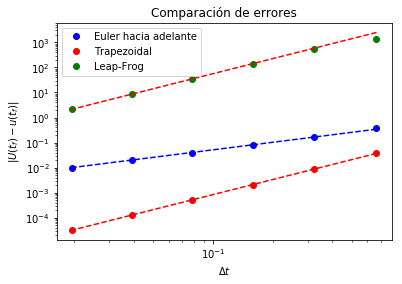

In [11]:
# Comparación Método de Euler y Leap-Frog
f = lambda t, u: -u
u_exact = lambda t: numpy.exp(-t)
u_0 = 1.0

t_f = 10.0
num_steps = [2**n for n in range(4,10)]
delta_t = numpy.empty(len(num_steps))
error_euler = numpy.empty(len(num_steps))
error_trap = numpy.empty(len(num_steps))
error_leapfrog = numpy.empty(len(num_steps))

for (i, N) in enumerate(num_steps):
    t = numpy.linspace(0, t_f, N)
    delta_t[i] = t[1] - t[0]
    
    # Compute Euler solution
    u_euler = numpy.empty(t.shape)
    u_euler[0] = u_0
    for n in range(t.shape[0] - 1):
        u_euler[n+1] = u_euler[n] + delta_t[i] * f(t[n], u_euler[n])
        
    # Compute trapezoidal
    u_trap = numpy.empty(t.shape)
    u_trap[0] = u_0
    integration_constant = (1.0 - delta_t[i] / 2.0) / (1.0 + delta_t[i] / 2.0)
    for n in range(t.shape[0] - 1):
        u_trap[n + 1] = u_trap[n] * integration_constant
        
    # Compute Leap-Frog
    u_leapfrog = numpy.empty(t.shape)
    u_leapfrog[0] = 1.0
    u_leapfrog[1] = u_euler[1]
    for n in range(1, t.shape[0] - 1):
        u_leapfrog[n+1] = u_leapfrog[n-1] + 2.0 * delta_t[i] * f(t[n], u_leapfrog[n])
        
    # Compute error for each
    error_euler[i] = numpy.linalg.norm(delta_t[i] * (u_euler - u_exact(t)), ord=1)
    error_trap[i] = numpy.linalg.norm(delta_t[i] * (u_trap - u_exact(t)), ord=1)
    error_leapfrog[i] = numpy.linalg.norm(delta_t[i] * (u_leapfrog - u_exact(t)), ord=1)
    
# Plot error vs. delta_t
fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)

order_C = lambda delta_x, error, order: numpy.exp(numpy.log(error) - order * numpy.log(delta_x))
axes.loglog(delta_t, error_euler, 'bo', label='Euler hacia adelante')
axes.loglog(delta_t, error_trap, 'ro', label='Trapezoidal')
axes.loglog(delta_t, error_leapfrog, 'go', label="Leap-Frog")

axes.loglog(delta_t, order_C(delta_t[2], error_euler[2], 1.0) * delta_t**1.0, '--b')
axes.loglog(delta_t, order_C(delta_t[2], error_trap[2], 2.0) * delta_t**2.0, '--r')
axes.loglog(delta_t, order_C(delta_t[2], error_leapfrog[2], 2.0) * delta_t**2.0, '--r')

axes.legend(loc=2)
axes.set_title("Comparación de errores")
axes.set_xlabel("$\Delta t$")
axes.set_ylabel("$|U(t_f) - u(t_f)|$")

plt.show()

### Métodos Predictor-Corrector

Los métodos de **predictor-corrector** realizan primero una predicción de la solución y después un próximo cálculo para corregir la predicción.

#### Método de Heun

Primero se realiza una predicción del valor de $U_{n+1}$ a través de $\hat{U}_{n+1}$ y para hacer el paso final se considera un promedio entre la derivada en el punto actual y la derivada en el punto obtenido por la predicción.
$$\begin{aligned}
    \hat{U}_{n+1} &= U_n + \Delta t f(U_n) \\
    U_{n+1} &= U_n + \frac{1}{2} \Delta t (f(U_n) + f(\hat{U}_{n+1}) 
\end{aligned}$$


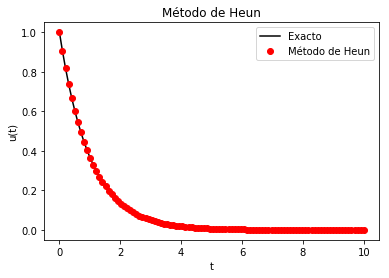

In [12]:
f = lambda t, u: -u

t_exact = numpy.linspace(0.0, 10.0, 100)
u_exact = numpy.exp(-t_exact)

N = 100
t = numpy.linspace(0, 10.0, N)
delta_t = t[1] - t[0]
U = numpy.empty(t.shape)

U[0] = 1.0
for n in range(t.shape[0] - 1):
    U[n+1] = U[n] + delta_t * f(t[n], U[n])
    U[n+1] = U[n] + 0.5 * delta_t * (f(t[n], U[n]) + f(t[n+1], U[n+1]))
    
fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)

axes.plot(t_exact, u_exact, 'k', label="Exacto")
axes.plot(t, U, 'ro', label="Método de Heun")

axes.set_title("Método de Heun")
axes.set_xlabel("t")
axes.set_ylabel("u(t)")
axes.legend(loc=1)

plt.show()

## Métodos Runge-Kutta

Una forma de mejorar la solución de EDOs es calculando pasos intermedios a través de los métodos **Runge-Kutta**.

### Ejemplo: Método Runga Kutta de segundo orden

Se aproxima la solución haciendo uso de la derivada en $t_n + \Delta t / 2$ con el método de Euler y esta se usa para evaluar la función para el siguiente paso.
$$\begin{aligned}
    U^* &= U^n + \frac{1}{2} \Delta t f(U^n) \\
    U^{n+1} &= U^n + \Delta t f(U^*) \\
    &= U^n + \Delta t f(U^n + \frac{1}{2} \Delta t f(U^n))
\end{aligned}$$

### Ejemplo: Método Runga Kutta de cuarto orden

$$\begin{aligned}
    Y_1 &= U_n \\
    Y_2 &= U_n + \frac{1}{2} \Delta t f(Y_1, t_n) \\
    Y_3 &= U_n + \frac{1}{2} \Delta t f(Y_2, t_n + \Delta t / 2) \\
    Y_4 &= U_n + \Delta t f(Y_3, t_n + \Delta t / 2) \\
    U_{n+1} &= U_n + \frac{\Delta t}{6} \left [f(Y_1, t_n) + 2 f(Y_2, t_n + \Delta t / 2) + 2 f(Y_3, t_n + \Delta t/2) + f(Y_4, t_n + \Delta t) \right ]
\end{aligned}$$

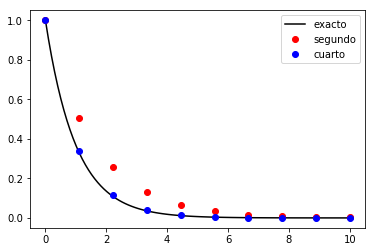

In [13]:
# Comparación Método Runga Kutta de segundo y cuarto orden
f = lambda t, u: -u

t_exact = numpy.linspace(0.0, 10.0, 100)
u_exact = numpy.exp(-t_exact)

N = 10
t = numpy.linspace(0, 10.0, N)
delta_t = t[1] - t[0]
u_2 = numpy.empty(t.shape)
u_4 = numpy.empty(t.shape)
u_2[0] = 1.0
u_4[0] = 1.0

for (n, t_n) in enumerate(t[1:]):
    u_2[n+1] = u_2[n] + 0.5 * delta_t * f(t_n, u_2[n])
    u_2[n+1] = u_2[n] + delta_t * f(t_n, u_2[n+1])
    y_1 = u_4[n]
    y_2 = u_4[n] + 0.5 * delta_t * f(t_n, y_1)
    y_3 = u_4[n] + 0.5 * delta_t * f(t_n + 0.5 * delta_t, y_2)
    y_4 = u_4[n] + delta_t * f(t_n + 0.5 * delta_t, y_3)
    u_4[n+1] = u_4[n] + delta_t / 6.0 * (f(t_n, y_1) + 2.0 * f(t_n + 0.5 * delta_t, y_2) + 2.0 * f(t_n + 0.5 * delta_t, y_3) + f(t_n + delta_t, y_4))
    
fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)

axes.plot(t_exact, u_exact, 'k', label="exacto")
axes.plot(t, u_2, 'ro', label="segundo")
axes.plot(t, u_4, 'bo', label="cuarto")
axes.legend(loc=1)

plt.show()

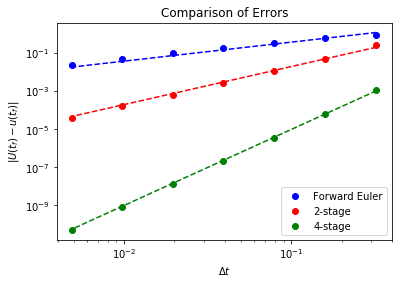

In [14]:
# Exactitud método Euler y Runga-Kutta
f = lambda t, u: -u
u_exact = lambda t: numpy.exp(-t)

t_f = 10.0
num_steps = [2**n for n in range(5,12)]
delta_t = numpy.empty(len(num_steps))
error_euler = numpy.empty(len(num_steps))
error_2 = numpy.empty(len(num_steps))
error_4 = numpy.empty(len(num_steps))

for (i, N) in enumerate(num_steps):
    t = numpy.linspace(0, t_f, N)
    delta_t[i] = t[1] - t[0]
    
    # Euler 
    U_euler = numpy.empty(t.shape)
    U_euler[0] = 1.0
    for (n, t_n) in enumerate(t[1:]):
        U_euler[n+1] = U_euler[n] + delta_t[i] * f(t_n, U_euler[n])
        
    # RK segundo y cuarto
    U_2 = numpy.empty(t.shape)
    U_4 = numpy.empty(t.shape)
    U_2[0] = 1.0
    U_4[0] = 1.0
    for (n, t_n) in enumerate(t[1:]):
        U_2[n+1] = U_2[n] + 0.5 * delta_t[i] * f(t_n, U_2[n])
        U_2[n+1] = U_2[n] + delta_t[i] * f(t_n, U_2[n+1])
        y_1 = U_4[n]
        y_2 = U_4[n] + 0.5 * delta_t[i] * f(t_n, y_1)
        y_3 = U_4[n] + 0.5 * delta_t[i] * f(t_n + 0.5 * delta_t[i], y_2)
        y_4 = U_4[n] + delta_t[i] * f(t_n + 0.5 * delta_t[i], y_3)
        U_4[n+1] = U_4[n] + delta_t[i] / 6.0 * (f(t_n, y_1) + 2.0 * f(t_n + 0.5 * delta_t[i], y_2) + 2.0 * f(t_n + 0.5 * delta_t[i], y_3) + f(t_n + delta_t[i], y_4))
        
    # Error 
    error_euler[i] = numpy.abs(U_euler[-1] - u_exact(t_f)) / numpy.abs(u_exact(t_f))
    error_2[i] = numpy.abs(U_2[-1] - u_exact(t_f)) / numpy.abs(u_exact(t_f))
    error_4[i] = numpy.abs(U_4[-1] - u_exact(t_f)) / numpy.abs(u_exact(t_f))
    
# Plot error vs. delta_t
fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)

axes.loglog(delta_t, error_euler, 'bo', label='Forward Euler')
axes.loglog(delta_t, error_2, 'ro', label='2-stage')
axes.loglog(delta_t, error_4, 'go', label="4-stage")

order_C = lambda delta_x, error, order: numpy.exp(numpy.log(error) - order * numpy.log(delta_x))
axes.loglog(delta_t, order_C(delta_t[1], error_euler[1], 1.0) * delta_t**1.0, '--b')
axes.loglog(delta_t, order_C(delta_t[1], error_2[1], 2.0) * delta_t**2.0, '--r')
axes.loglog(delta_t, order_C(delta_t[1], error_4[1], 4.0) * delta_t**4.0, '--g')

axes.legend(loc=4)
axes.set_title("Comparison of Errors")
axes.set_xlabel("$\Delta t$")
axes.set_ylabel("$|U(t_f) - u(t_f)|$")

plt.show()